## Eigenvalues and Angles Between Eigenvectors

In [5]:
from res_specialization import *
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


In [6]:
TOL = 5
NUM_TO_SPEC = 10
diff_eq_params = {"x0": [-20, 10, -.5], 
                  "begin": 0, 
                  "end": 60, 
                  "timesteps":60000}

res_params = {"res_sz": 30, 
              "activ_f": np.tanh,
              "connect_p": .08, 
              "ridge_alpha": .00001, 
              "spect_rad": .9, 
              "gamma": 1., 
              "sigma": 0.12,
              "uniform_weights": True,
              "solver": "least squares"
             }

t, train_t, u = lorenz_equ(**diff_eq_params )
train_t = t[30000:55000]
test_t  = t[55000:]

In [7]:
def evec_angles(A):
    Q = np.linalg.eig(A)[1]
    angles = np.tril(Q.conj().T.dot(Q))
    angles = angles[np.tril_indices(A.shape[0], k=-1)]
    return abs(angles)
# end

Rand err: 1.007878122601872
Rand pre: 705
Spec Err: 0.0982939904589304
Spec Pre: 776
Ctrl Err: 0.1102420948724651
Ctrl Pre: 770
Ctrl Number of Components: 38


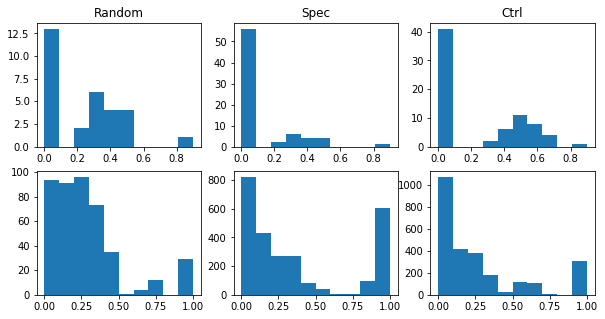

In [8]:
# Make rc
rc = ResComp(3,3,**res_params)
r_0 = rc.state_0
err = rc.fit(train_t,u)

# Make predicitions
test_pre = rc.predict(test_t)
train_pre = rc.predict(train_t, r_0=r_0)

# Eigen information
eig_size = np.abs(np.linalg.eigvals(rc.res))
eig_angles = evec_angles(rc.res).real

# Plot

plt.subplot(231)
plt.hist(eig_size)
plt.title("Random")
plt.subplot(234)
plt.hist(eig_angles)

print("Rand err: {}".format(err))
print("Rand pre: {}".format(how_long_accurate(u(test_t), test_pre, tol=TOL)))

#################
# Specialized graph
##################

A = specialize_best_nodes(rc, NUM_TO_SPEC, u, train_t, r_0=r_0)
rc = make_res_comp(A, res_params)

r_0 = rc.state_0
err = rc.fit(train_t,u)
test_pre = rc.predict(test_t)
train_pre = rc.predict(train_t, r_0=r_0)

# Eigen information
eig_size = np.abs(np.linalg.eigvals(rc.res))
eig_angles = evec_angles(rc.res).real

# Plot

plt.subplot(232)
plt.hist(eig_size)
plt.title("Spec")
plt.subplot(235)
plt.hist(eig_angles)
print("Spec Err: {}".format(err))
print("Spec Pre: {}".format(how_long_accurate(u(test_t), test_pre, tol=TOL)))

##########
# Control
###########

# Make and fit RC
params = copy.copy(res_params)
params["res_sz"] = A.shape[0]
params["connect_p"] = np.sum(A)/(A.shape[0]**2)
rc = ResComp(3,3,**params)
r_0 = rc.state_0
err = rc.fit(train_t,u)

# Predict
test_pre = rc.predict(test_t)
train_pre = rc.predict(train_t, r_0=r_0)

# Eigen information
eig_size = np.abs(np.linalg.eigvals(rc.res))
eig_angles = evec_angles(rc.res).real

# Plot

plt.subplot(233)
plt.hist(eig_size)
plt.title("Ctrl")
plt.subplot(236)
plt.hist(eig_angles)
print("Ctrl Err: {}".format(err))
print("Ctrl Pre: {}".format(how_long_accurate(u(test_t), test_pre, tol=TOL)))
G = nx.DiGraph(rc.res.T)
scc = [s for s in nx.strongly_connected_components(G)]
print("Ctrl Number of Components: {}".format(len(scc)))

In [9]:
# Make res computer

rc = ResComp(3,3,**res_params)
r_0 = rc.state_0
err = rc.fit(train_t,u)

np.argsort(score_nodes(rc, u, train_t, r_0=r_0))


array([12, 16, 14,  3,  2,  0,  9, 11,  8, 28, 23, 26,  7, 24,  1, 10, 22,
        6, 19, 15, 29, 25, 13,  5, 21, 17, 20, 27,  4, 18])

In [10]:
x = np.argsort(avg_score_nodes(rc.res, rc.params, u, train_t, trials=1000))

In [11]:
y = np.argsort(avg_score_nodes(rc.res, rc.params, u, train_t, trials=1000))

/Users/djpassey/Code/NetworkResearch/Reservoir Computing/ResComp.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  self.res *= spect_rad/max(np.linalg.eigvals(self.res)).real
/Users/djpassey/Code/NetworkResearch/Reservoir Computing/ResComp.py:29: RuntimeWarning: invalid value encountered in multiply
  self.res *= spect_rad/max(np.linalg.eigvals(self.res)).real


In [12]:
import scipy as sp

In [13]:
sp.stats.kendalltau(x,y)

KendalltauResult(correlation=0.03908045977011494, pvalue=0.7772097145495377)

Rand err: 0.9528684222541765
Rand pre: 508
Spec Err: 0.3429192872117447
Spec Pre: 755


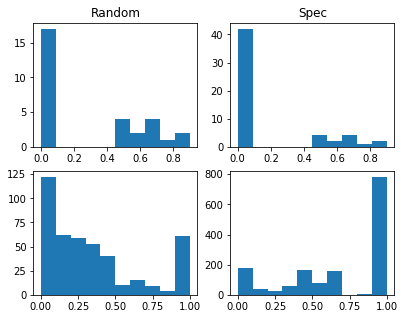

In [19]:
# Make rc
rc = ResComp(3,3,**res_params)
r_0 = rc.state_0
err = rc.fit(train_t,u)

# Make predicitions
test_pre = rc.predict(test_t)
train_pre = rc.predict(train_t, r_0=r_0)

# Eigen information
eig_size = np.abs(np.linalg.eigvals(rc.res))
eig_angles = evec_angles(rc.res).real

# Plot

plt.subplot(231)
plt.hist(eig_size)
plt.title("Random")
plt.subplot(234)
plt.hist(eig_angles)

print("Rand err: {}".format(err))
print("Rand pre: {}".format(how_long_accurate(u(test_t), test_pre, tol=TOL)))

#################
# Specialized graph
##################

A = specialize_best_nodes(rc, NUM_TO_SPEC, u, train_t, r_0=r_0)
rc = make_res_comp(A, res_params)

r_0 = rc.state_0
err = rc.fit(train_t,u)
test_pre = rc.predict(test_t)
train_pre = rc.predict(train_t, r_0=r_0)

# Eigen information
eig_size = np.abs(np.linalg.eigvals(rc.res))
eig_angles = evec_angles(rc.res).real

# Plot

plt.subplot(232)
plt.hist(eig_size)
plt.title("Spec")
plt.subplot(235)
plt.hist(eig_angles)
print("Spec Err: {}".format(err))
print("Spec Pre: {}".format(how_long_accurate(u(test_t), test_pre, tol=TOL)))

In [20]:
Q = np.linalg.eig(A)[1]
angles = np.tril(Q.conj().T.dot(Q))
angles = angles[np.tril_indices(A.shape[0], k=-1)]

array([ 0.+0.j,  0.+0.j, -1.+0.j, ...,  1.+0.j, -1.+0.j, -1.+0.j])

In [16]:
A = np.array([[0,0,1,1,1],
              [1,0,0,0,0],
              [0,1,0,0,0],
              [0,1,0,0,0],
              [0,1,0,0,0]
             ])

In [17]:
Q = np.linalg.eig(A)[1]

In [18]:
np.round(Q,3)

array([[ 0.678+0.j   ,  0.678-0.j   ,  0.678+0.j   ,  0.   +0.j   ,
         0.   +0.j   ],
       [-0.235-0.407j, -0.235+0.407j,  0.47 +0.j   ,  0.   +0.j   ,
         0.   +0.j   ],
       [-0.163+0.282j, -0.163-0.282j,  0.326+0.j   , -0.577+0.j   ,
        -0.577+0.j   ],
       [-0.163+0.282j, -0.163-0.282j,  0.326+0.j   ,  0.789+0.j   ,
        -0.211+0.j   ],
       [-0.163+0.282j, -0.163-0.282j,  0.326+0.j   , -0.211+0.j   ,
         0.789+0.j   ]])

1. Count generalized eigenvectors in random specialization and eigenvalue distribution
2. Kendal Tau 10000
3. Without reg running

